# 1. Loan Classification

## Data preprocessing dan EDA

Import libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
bank=pd.read_csv('Bank_Loan_Granting.csv')

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


Checking for NULL dan duplicate values

In [5]:
bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#cek jumlah data yang terduplikasi
bank.duplicated().sum()

0

Tidak ada data NULL maupun yang terduplikasi

ID tidak akan digunakan karena hanya sekedar menandai barisan data

In [118]:
# drop kolom yang tidak digunakan
bank.drop(['ID'],axis = 1,inplace=True)
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


Tidak ada keterangan lebih lanjut mengenai kolom CCAvg sehingga diasumsikan bahwa 1/60 berarti $1.60, sehingga '/' diubah menjadi '.'

In [119]:
# replace / menjadi . pada kolom CCAvg
bank['CCAvg'] = bank['CCAvg'].str.replace("/" , '.').astype(np.float64)
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Mengecek isi2 masing-masing kolom/fitur.

In [9]:
for i in bank.columns:
    print(bank[i].value_counts())

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43

In [10]:
# melihat persebaran data dalam dataframe
bank.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Karena terdapat data dalam experience yang bernilai negatif (tidak mungkin waktu bernilai negatif), data diubah menggunakan abs agar semua bernilai positif.

In [120]:
# mengubah nilai2 negatif menjadi non-negatif
bank['Experience']=abs(bank['Experience'])
bank.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Mengecek persebaran data berdasarkan kelas masing-masing variabel menggunakan barplots

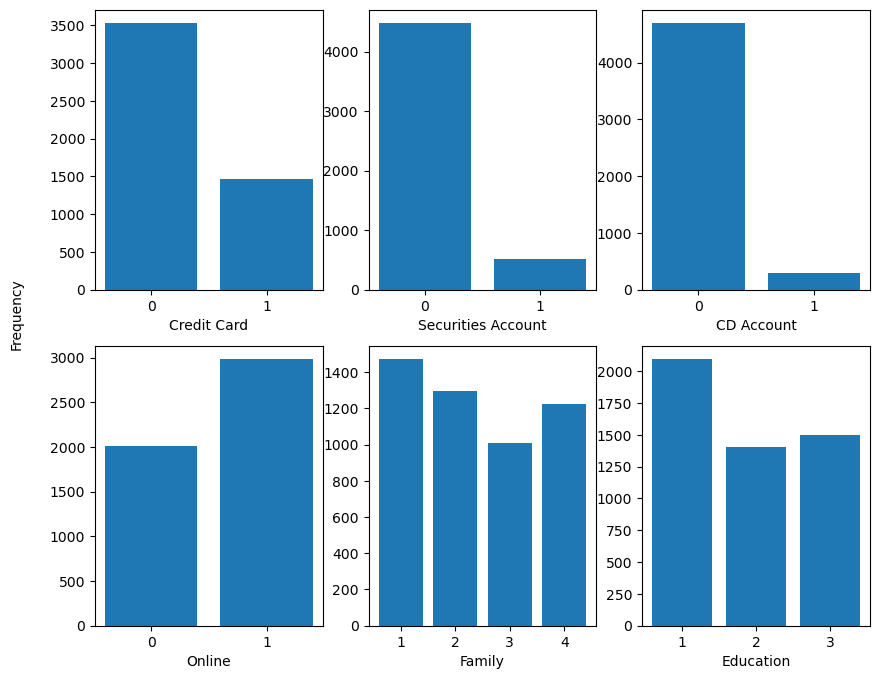

In [12]:
cc = bank['CreditCard'].value_counts()
sec = bank['Securities Account'].value_counts()
cd = bank['CD Account'].value_counts()
online = bank['Online'].value_counts()
pers_loan = bank['Personal Loan'].value_counts()
edu = bank['Education'].value_counts()
fam = bank['Family'].value_counts()

fig, ax = plt.subplots(2, 3, figsize=(10, 8))

ax[0,0].bar(cc.index, cc.values)
ax[0,0].set_xlabel('Credit Card')
ax[0,0].set_xticks(cc.index)

ax[0,1].bar(sec.index, sec.values)
ax[0,1].set_xlabel('Securities Account')
ax[0,1].set_xticks(sec.index)

ax[0,2].bar(cd.index, cd.values)
ax[0,2].set_xlabel('CD Account')
ax[0,2].set_xticks(cd.index)

ax[1,0].bar(online.index, online.values)
ax[1,0].set_xlabel('Online')
ax[1,0].set_xticks(online.index)

ax[1,1].bar(fam.index,fam.values)
ax[1,1].set_xlabel('Family')
ax[1,1].set_xticks(fam.index)

ax[1,2].bar(edu.index, edu.values)
ax[1,2].set_xlabel('Education')
ax[1,2].set_xticks(edu.index)

fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.show()

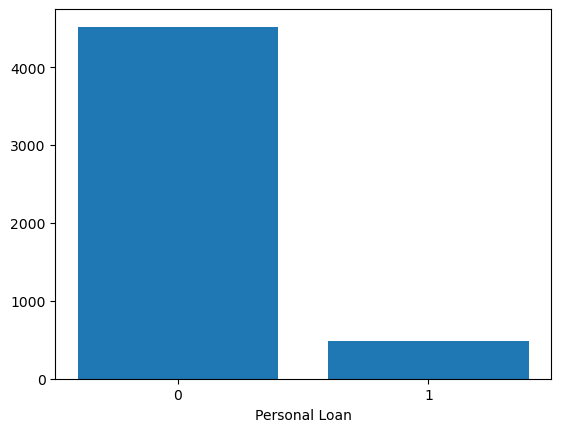

In [13]:
plt.bar(pers_loan.index, pers_loan.values)
plt.xlabel('Personal Loan')
plt.xticks(pers_loan.index)
plt.show()

Pada barplots (khusus data berkategori) di atas, terlihat bahwa terdapat class imbalance yang signifikan pada fitur 'Securities Account', 'CD Account', 'Personal Loan', serta 'Credit Card'.

### Boxplots

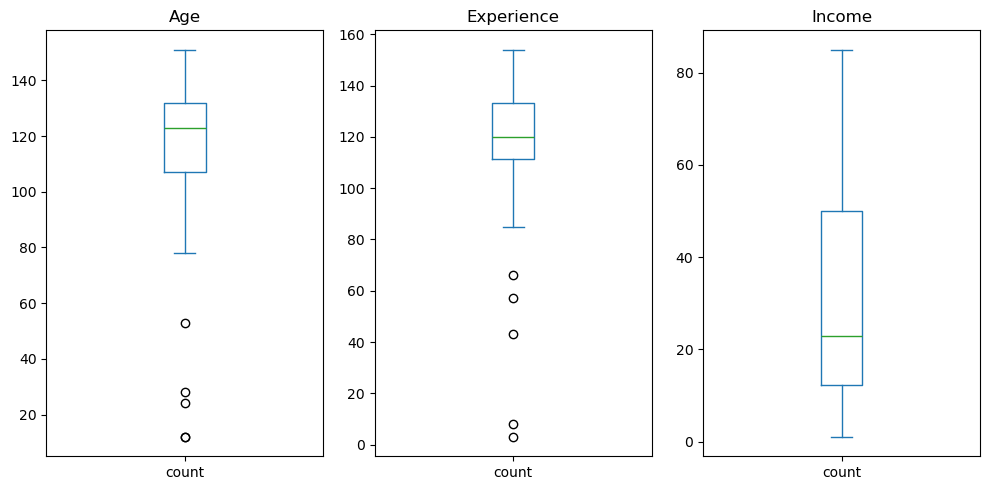

In [14]:
fig, ax = plt.subplots(1,3, figsize = (10, 5))

features = ['Age', 'Experience', 'Income']
value_counts = [bank[feature].value_counts() for feature in features]

# Plot boxplots for each feature's frequencies
for ax, counts, feature in zip(ax.flatten(), value_counts, features):
    counts.plot(kind='box', ax=ax)
    ax.set_title(f'{feature}')

plt.tight_layout()
plt.show()

Terdapat outlier dalam kolom age dan experience, tetapi karena jumlahnya tidak banyak, tidak dihandle.

{'whiskers': [<matplotlib.lines.Line2D at 0x1494ee60410>,
 'caps': [<matplotlib.lines.Line2D at 0x1494ee61d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1494ee2bd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1494ee633d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1494ee63ed0>],
 'means': []}

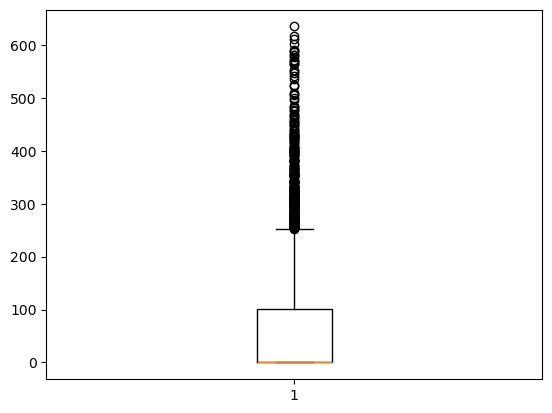

In [15]:
plt.boxplot(bank['Mortgage'])

Terdapat keanehan pada boxplot mortgage, sehingga digunakanlah stripplot untuk melihat persebaran data mortgage.

<Axes: ylabel='Mortgage'>

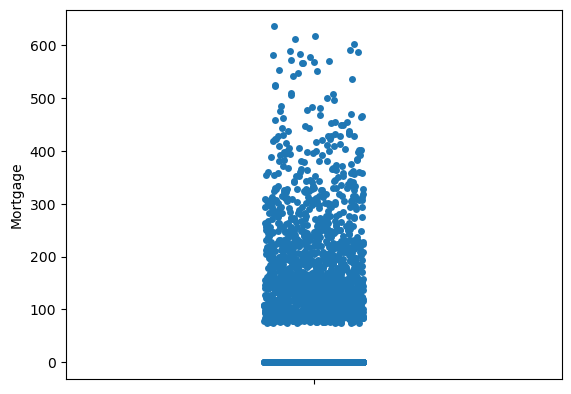

In [16]:
import seaborn as sns
sns.stripplot(bank['Mortgage'])

Ternyata nilai mortgage antara 0 atau di atas sebuah value (dekat dengan 100, mungkin sekitar 80). Nilai 0 maupun di atas 80 tidak dapat dikatakan outlier karena nilai dari sebuah jaminan tentu berbeda-beda dan tidak semua orang mempunyai jaminan.

### Feature correlation

In [121]:
continuous = bank[['Age','Experience','Income','ZIP Code','CCAvg','Mortgage']]
discrete = bank[['Family','Education','Securities Account','CD Account','Online','CreditCard']]

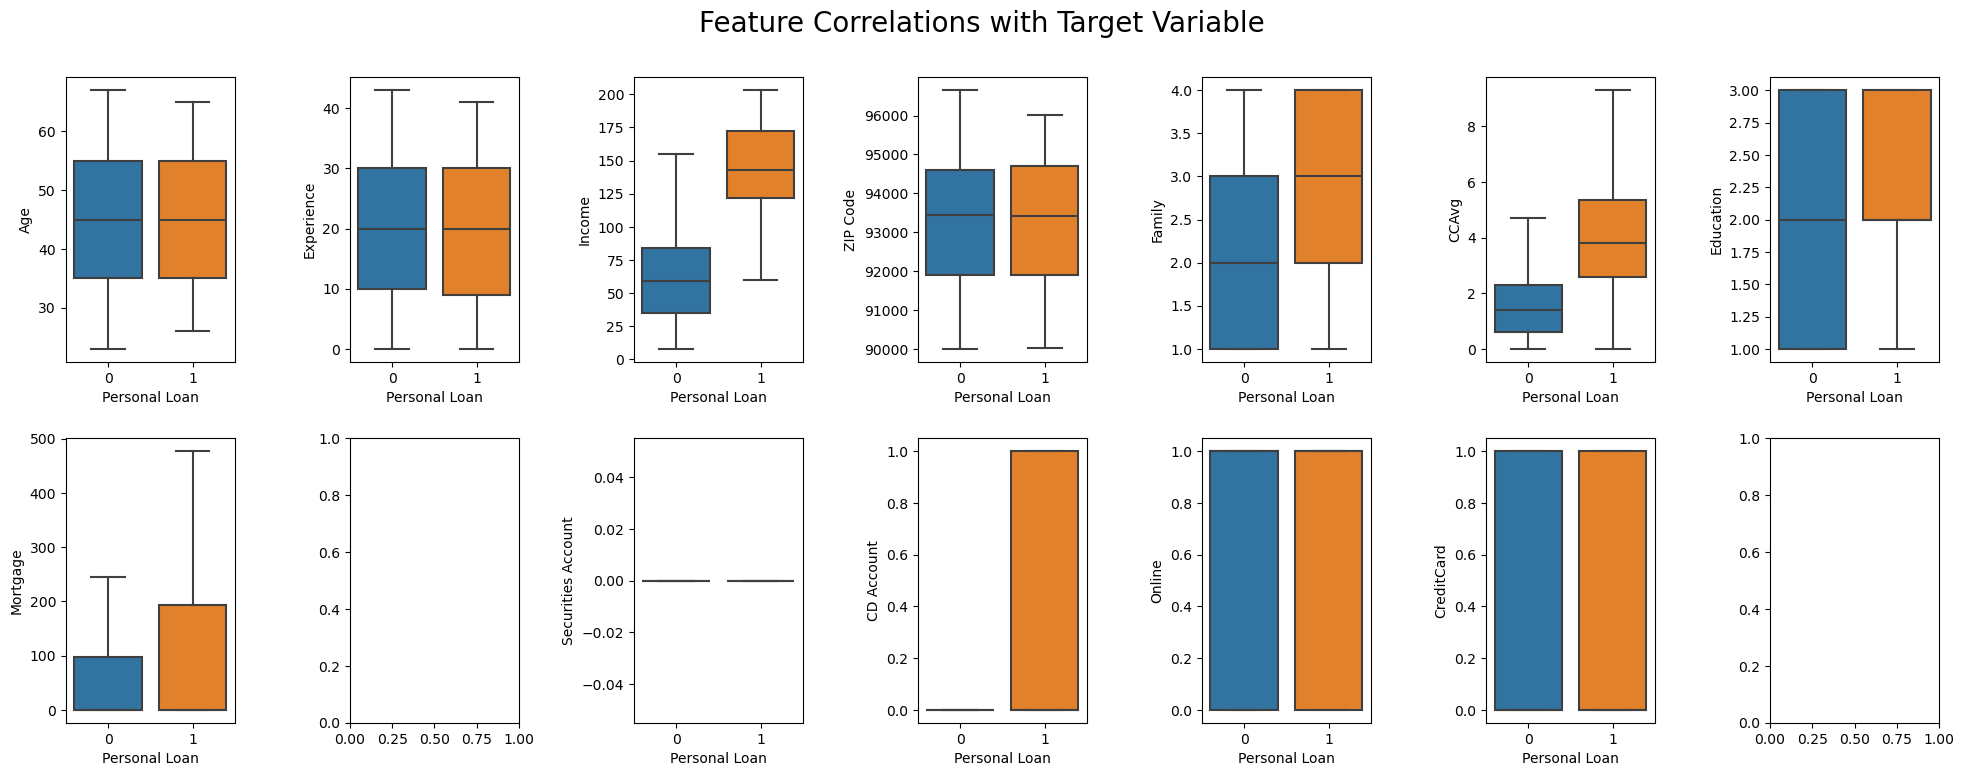

In [18]:
fig, ax = plt.subplots(2,7, figsize = (20, 8))

for feature, subplot in zip(bank, ax.flatten()):
    if feature == 'Personal Loan':
        continue
    sns.boxplot(x = bank['Personal Loan'], y = bank[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['0', '1'])

plt.suptitle('Feature Correlations with Target Variable', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

- Pada perbandingan fitur Age, Experience serta zip code tidak terlihat relasi terhadap personal loan. Tidak menutup kemungkinan ada relasi non-linear.
- Kolom2 biner seperti Securities Account, CD Account, Online, dan CreditCard tidak cocok menggunakan boxplot ini sebagai pembanding, tapi dari sini kita bisa melihat bahwa para penerima personal loan kebanyakan memiliki CD Account.
- Pada boxplot income, terlihat bahwa income yang lebih tinggi memperbesar kemungkinan diterimanya personal loan. Pada boxplot family terlihat bahwa jumlah penerima loan lebih banyak pada keluarga dengan 2 anggota atau lebih. Pada boxplot CCAvg, terlihat juga bahwa semakin tinggi average credit cardnya semakin banyak personal loan yang diterima.

### Countplot

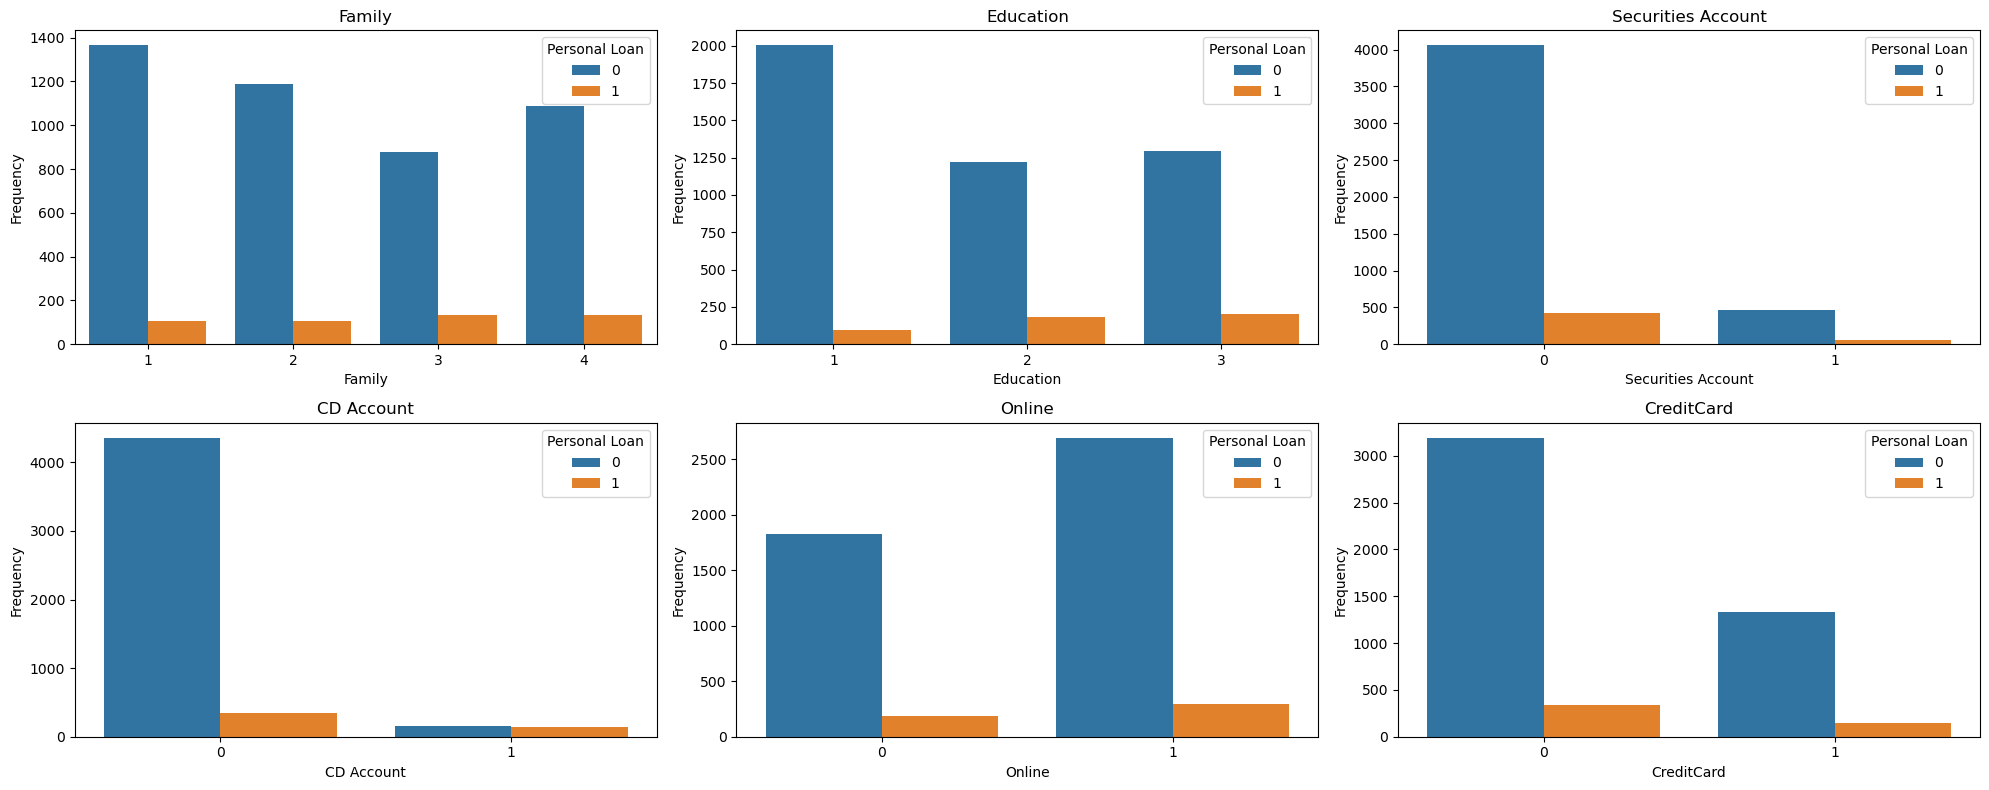

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))

for col, subplot in zip(discrete, ax.flatten()):
    sns.countplot(x=col, hue=bank['Personal Loan'].astype(str), data=bank, ax=subplot)
    subplot.set_title(f"{col}")
    subplot.set_xlabel(col)
    subplot.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Pada countplot di atas, lebih terlihat perbandingan jumlah masing-masing fitur dengan personal loan. 
- Family: semakin banyak anggota keluarga, semakin besar kemungkinan diterima personal loans.
- Education: tingkat pendidikan yang lebih tinggi = semakin banyak loans diterima
- Securities Account, CD Account, Credit Card: apabila tidak ada maka kemungkinan loans diterima semakin besar
- Online: kalau client menggunakan online services yang ditawarkan bank, maka kemungkinan personal loan diterima akan semakin besar

## Data Splitting

In [122]:
# split train, test and validation data
bank_input=bank[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education',
                 'Mortgage','Securities Account','CD Account','Online','CreditCard']]
bank_target=bank[['Personal Loan']]

#split training and testing data
from sklearn.model_selection import train_test_split
# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(bank_input, bank_target, test_size=0.1, random_state=42)
# split train data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.111, random_state=42)

# check train, test, validation data amount
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))

Training set size: 4000
Validation set size: 500
Test set size: 500


## Standardizing features

In [123]:
to_scale = list(bank[['Age','Experience','Income','CCAvg','Mortgage']])

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), to_scale)
    ],
    remainder='passthrough'
)

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


In [125]:
print(x_train_scaled.shape)
print(x_val_scaled.shape)
print(x_test_scaled.shape)

(4000, 12)
(500, 12)
(500, 12)


In [126]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4000, 1)
(500, 1)
(500, 1)


## Oversampling using SMOTE

In [127]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [128]:
unique_values, value_counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

0: 3616
1: 384


In [129]:
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(7232, 12)
(7232, 1)


Kesimpulan:
- Terdapat beberapa masalah yang ditemukan dalam data, di antaranya adalah class imbalance. Perbandingan loan yang ditolak dan diterima bagai langit dan bumi. Dengan data yang seperti ini, model sulit mempelajari apa yang menyebabkan loan diterima karena jumlah data loan yang diterima sangat sedikit. Oleh karena itu dilakukan oversampling dengan harapan dapat meningkatkan kinerja model.
- Tidak ada NULL maupun duplicate values. Outlier juga tidak signifikan sehingga tidak ada row yang didrop atau data yang didelete.
- Terdapat data 'aneh' seperti experience yang bernilai negatif, maupun CCAvg yang tidak terlalu jelas isi datanya (entah merujuk pada keuangan atau gimana). Nilai exp yang negatif juga hanya sedikit sehingga tidak didrop datanya dan bisa langsung diabsolut.
- Semua data sudah dalam bentuk angka sehingga tidak diperlukan encoding.
- Karena data continuous yang memiliki range yang cukup besar, dilakukan standarisasi setelah splitting untuk meningkatkan efisiensi model.
- Kolom zip code tidak seharusnya bertipe data integer karena kita tidak boleh melakukan operasi padanya. Tidak saya ubah karena di beberapa bagian code, akan sulit bila zip code bertipe data string. 
- Age, Experience dan zip code tidak memiliki hubungan korelasi dengan personal loan yang dapat terlihat dengan jelas, tetapi saya memilih untuk tidak drop ketiga kolom ini.

## d. Baseline Architecture

Model pertama dibuat sesuai soal, tetapi karena diminta 2 nodes untuk output, dimana output sebenarnya merupakan binary yang hanya perlu 1 node, saya gunakan 'sparse_categorical_crossentropy', loss function untuk multiclass untuk lossnya.

In [130]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(12,)))
model.add(Dense(24, activation='relu'))
model.add(Dense(2,   activation='softmax'))
model.compile(optimizer="sgd", loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 962 (3.76 KB)

 Trainable params: 962 (3.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [131]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [132]:
model.fit(x_train_resampled, y_train_resampled, epochs=20, verbose=2, callbacks=[early_stopping])

Epoch 1/20
226/226 - 0s - 1ms/step - accuracy: 0.5000 - loss: 1008868224.0000
Epoch 2/20
226/226 - 0s - 687us/step - accuracy: 0.4912 - loss: 0.6932
Epoch 3/20
226/226 - 0s - 736us/step - accuracy: 0.4989 - loss: 0.6932
Epoch 4/20
226/226 - 0s - 674us/step - accuracy: 0.4884 - loss: 0.6932
Epoch 5/20
226/226 - 0s - 642us/step - accuracy: 0.4950 - loss: 0.6932
Epoch 6/20
226/226 - 0s - 656us/step - accuracy: 0.4981 - loss: 0.6932
Epoch 7/20
226/226 - 0s - 646us/step - accuracy: 0.4917 - loss: 0.6932
Epoch 8/20
226/226 - 0s - 637us/step - accuracy: 0.4978 - loss: 0.6932
Epoch 9/20
226/226 - 0s - 646us/step - accuracy: 0.4967 - loss: 0.6932
Epoch 10/20
226/226 - 0s - 617us/step - accuracy: 0.5033 - loss: 0.6932
Epoch 11/20
226/226 - 0s - 610us/step - accuracy: 0.5017 - loss: 0.6932
Epoch 12/20
226/226 - 0s - 620us/step - accuracy: 0.4906 - loss: 0.6932
Epoch 13/20
226/226 - 0s - 618us/step - accuracy: 0.4848 - loss: 0.6932
Epoch 14/20
226/226 - 0s - 611us/step - accuracy: 0.4931 - loss: 0

In [133]:
train_result=model.predict(x_train_resampled)
test_result=model.predict(x_val_scaled)

226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Karena output menggunakan softmax, hasil prediksi berbentuk probabilitas -- seberapa bersar kemungkinan keluar class 0/1. Sehingga saya tetapkan apabila probabilitas di atas 0.5 maka dimasukkan ke class 1 dan sisanya class 0.

In [134]:
threshold = 0.5
train_pred = (train_result[:, 1] > threshold).astype(int)
test_pred = (test_result[:, 1] > threshold).astype(int)

In [135]:
print(np.unique(train_result))
print(np.unique(test_result))

[0.49897918 0.5010208 ]
[0.49897918 0.5010208 ]


Hasil probabilitas untuk class '0' adalah 0.499, class '1' 0.5 untuk train dan hasil yang sama untuk test (validation set)

In [136]:
print(np.unique(train_pred))
print(np.unique(test_pred))

[1]
[1]


Isi dari train_pred dan test_pred hanya terdiri dari angka 1.

In [137]:
from sklearn.metrics import classification_report

print("Training")
print(classification_report(y_train_resampled,train_pred))
print("Validation")
print(classification_report(y_val,test_pred))

Training
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3616
           1       0.50      1.00      0.67      3616

    accuracy                           0.50      7232
   macro avg       0.25      0.50      0.33      7232
weighted avg       0.25      0.50      0.33      7232

Validation
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       458
           1       0.08      1.00      0.15        42

    accuracy                           0.08       500
   macro avg       0.04      0.50      0.08       500
weighted avg       0.01      0.08      0.01       500



Hasil model kurang baik, dengan akurasi untuk validation hanya 8%. Semua nilai untuk class '0' juga hasilnya 0, karena seperti yang terlihat pada isi train_pred dan test_pred, isinya hanya angka 1, tidak ada yang 0, sehingga model tidak dapat memprediksi apapun sebagai 0.

e. Modified Architecture

Yang diubah dari segi arsitektur adalah activation function, jumlah layers, jumlah nodes dan optimizer. Lalu dari segi hyperparameter yaitu jumlah epoch. Pada model kedua, ditambahkan jumlah node per hidden layer, dan diubah activation functionnya juga, dari relu ke leaky_relu. Optimizer diubah menjadi adam. Ditambahkan pula 3 hidden layer. Penggunaan 100 nodes hanyalah angka random untuk melihat perubahan akurasi jika jumlah node ditingkatkan secara signifikan.

In [138]:
model2 = Sequential()
model2.add(Dense(100, activation='tanh', input_shape=(12,)))
model2.add(Dense(100, activation='tanh'))
model2.add(Dense(100, activation='tanh'))
model2.add(Dense(100, activation='tanh'))
model2.add(Dense(100, activation='tanh'))
model2.add(Dense(2,   activation='softmax'))
model2.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])
print(model2.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,902 (163.68 KB)

 Trainable params: 41,902 (163.68 KB)

 Non-trainable params: 0 (0.00 B)

None


In [139]:
model2.fit(x_train_resampled, y_train_resampled, epochs=30, verbose=2, callbacks=[early_stopping])

Epoch 1/30
226/226 - 1s - 6ms/step - accuracy: 0.4912 - loss: 0.7090
Epoch 2/30
226/226 - 0s - 897us/step - accuracy: 0.5061 - loss: 0.6994
Epoch 3/30
226/226 - 0s - 867us/step - accuracy: 0.4972 - loss: 0.6992
Epoch 4/30
226/226 - 0s - 867us/step - accuracy: 0.5022 - loss: 0.6971
Epoch 5/30
226/226 - 0s - 969us/step - accuracy: 0.5014 - loss: 0.6978
Epoch 6/30
226/226 - 0s - 1ms/step - accuracy: 0.5008 - loss: 0.6960
Epoch 7/30
226/226 - 0s - 1ms/step - accuracy: 0.4887 - loss: 0.6966
Epoch 8/30
226/226 - 0s - 856us/step - accuracy: 0.4967 - loss: 0.6965
Epoch 9/30
226/226 - 0s - 851us/step - accuracy: 0.5025 - loss: 0.6955
Epoch 10/30
226/226 - 0s - 951us/step - accuracy: 0.5039 - loss: 0.6967
Epoch 11/30
226/226 - 0s - 865us/step - accuracy: 0.5006 - loss: 0.6972
Epoch 12/30
226/226 - 0s - 906us/step - accuracy: 0.4961 - loss: 0.6954
Epoch 13/30
226/226 - 0s - 861us/step - accuracy: 0.4895 - loss: 0.6955
Epoch 14/30
226/226 - 0s - 851us/step - accuracy: 0.4989 - loss: 0.6957
Epoch 1

In [140]:
train_result2=model2.predict(x_train_resampled)
test_result2=model2.predict(x_val_scaled)

226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [141]:
threshold = 0.5
train_pred2 = (train_result2[:, 1] > threshold).astype(int)
test_pred2 = (test_result2[:, 1] > threshold).astype(int)

In [142]:
print(np.unique(train_result2))
print(np.unique(test_result2))
print(np.unique(train_pred2))
print(np.unique(test_pred2))

[0.48252627 0.51747376]
[0.48252627 0.51747376]
[0]
[0]


In [143]:
(train_result2[:, 1])

array([0.48252627, 0.48252627, 0.48252627, ..., 0.48252627, 0.48252627,
       0.48252627], dtype=float32)

In [144]:
print("Training")
print(classification_report(y_train_resampled,train_pred2))
print("Validation")
print(classification_report(y_val,test_pred2))

Training
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3616
           1       0.00      0.00      0.00      3616

    accuracy                           0.50      7232
   macro avg       0.25      0.50      0.33      7232
weighted avg       0.25      0.50      0.33      7232

Validation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       458
           1       0.00      0.00      0.00        42

    accuracy                           0.92       500
   macro avg       0.46      0.50      0.48       500
weighted avg       0.84      0.92      0.88       500



Dapat dilihat bahwa precision, reccall, f1-score, maupun accuracy sudah meningkat, meski kali ini class '1' yang 0 semua.

Karena ditakutkan muncul result seperti inilah, dari awal dilakukan oversampling untuk mengatasi class imbalance. Activation function tanh digunakan karena output hanya terdiri dari 0/1, sesuai range [0,1] dimana reLU memiliki range [0,infinity)

f. Evaluation

In [145]:
test_result_final=model2.predict(x_test_scaled)
test_final_pred = (test_result_final[:, 1] > threshold).astype(int)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


In [146]:
print("Testing")
print(classification_report(y_test,test_final_pred))

Testing
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       446
           1       0.00      0.00      0.00        54

    accuracy                           0.89       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.80      0.89      0.84       500



Dengan arsitektur yang telah dimodifikasi terlihat bahwa semua metrik memberi hasil yang cukup baik, tetapi dapat dilihat bahwa nilai precision, recall, f1-score untuk class '1' adalah 0. 
- Accuracy yang tinggi bisa saja didapatkan hanya dengan memprediksi 1 class dengan baik karena hitungan accuracy adalah (total benar/total prediksi). Artinya semua orang yang qualified untuk mendapat personal loan dilabel tidak qualified.
- Precision menunjuk pada seberapa akurat penilaian true positivenya (yang diprediksi 'A' dan memang 'A'). Precision utk class '0' adalah 0.89, dalam artian 89% dari semua yang dianggap class '0' oleh model adalah memang class 0. Sedangkan untuk class '1', tidak ada yang diprediksi dengan benar.
- Recall merujuk pada seberapa banyak positive yang dapat diidentifikasi dengan benar oleh model di antara semua positives yang ada. Recall untuk class '0' adalah 1, dalam artian model dapat mengidentifikasi semua class '0' dengan sempurna. Di lain sisi, recall untuk class '1' adalah 0. Artinya ia tidak dapat mengidentifikasi class '1' sama sekali.
- F1-score (harmonic mean between precision dan recall) untuk class '0' bernilai 0.94 artinya precision dan recall untuk class '0' sudah sangat baik. F1-score untuk class '1' adalah 0, dimana artinya kinerja model baik dari segi precision maupun recall untuk mengidentifikasi class '1' sangatlah buruk.

Meski sudah dilakukan oversampling tetapi model tetap tidak mampu mengcapture pola dengan baik, sehingga didapatkan nilai yang bagus untuk satu class, tetapi nilai yang sangat parah untuk class yang lain.

g. Video Link

https://drive.google.com/drive/folders/1R87CpQG4sOwue4cyvQrcKc-ce_N5AZhD?usp=sharing

Link di atas berisi dua video, yang pertama utk no.1 dan vid kedua utk no.2

# 2. CNN

In [59]:
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
from keras import layers, Model
from keras.callbacks import EarlyStopping
from keras.layers import Dropout, BatchNormalization

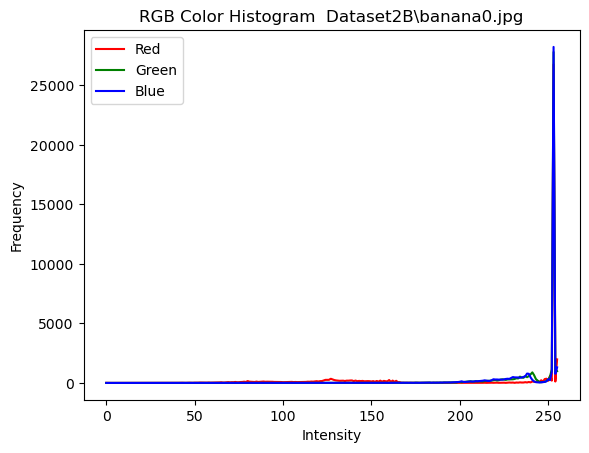

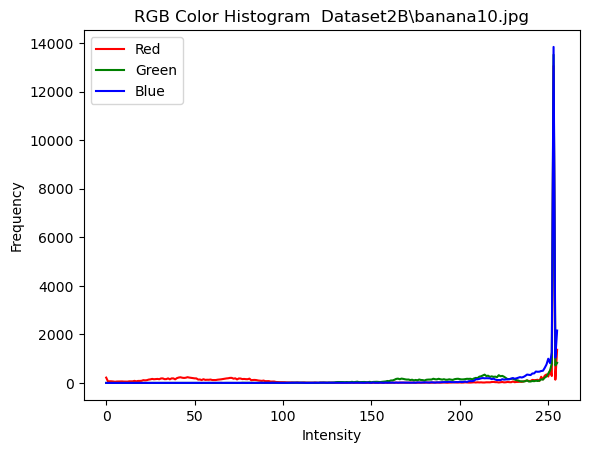

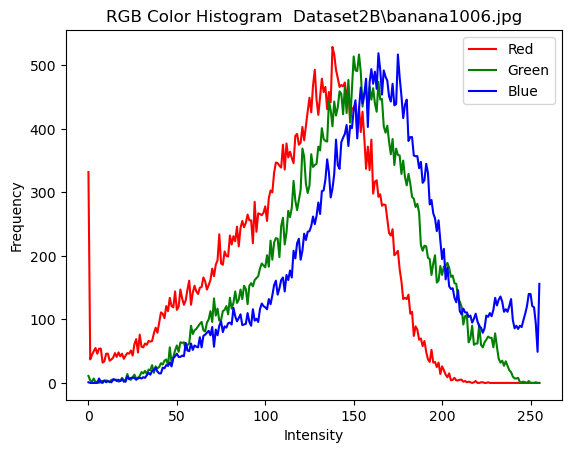

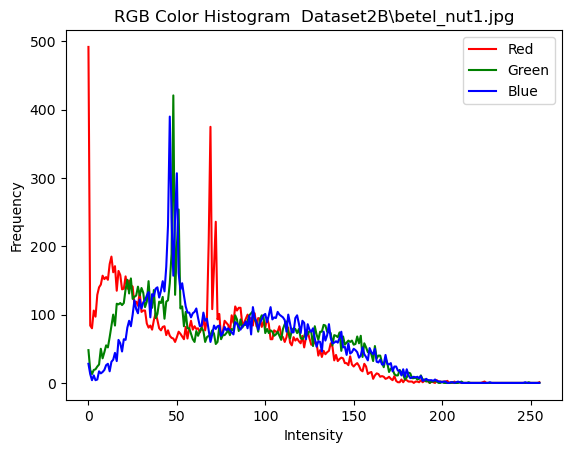

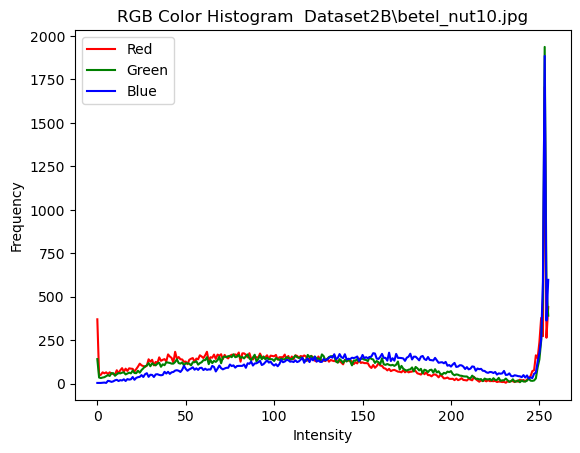

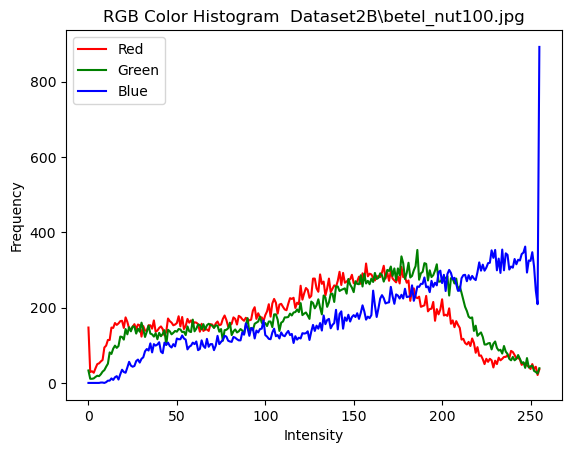

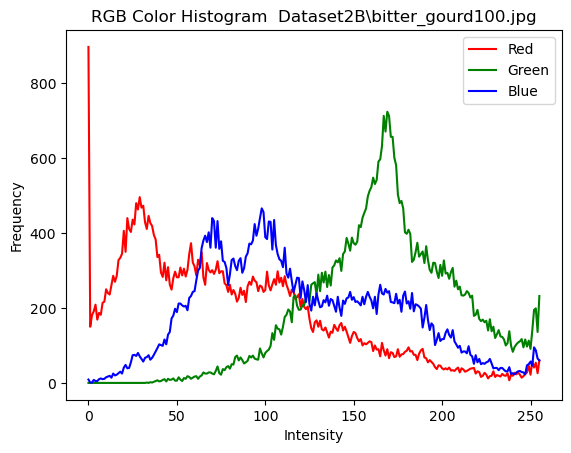

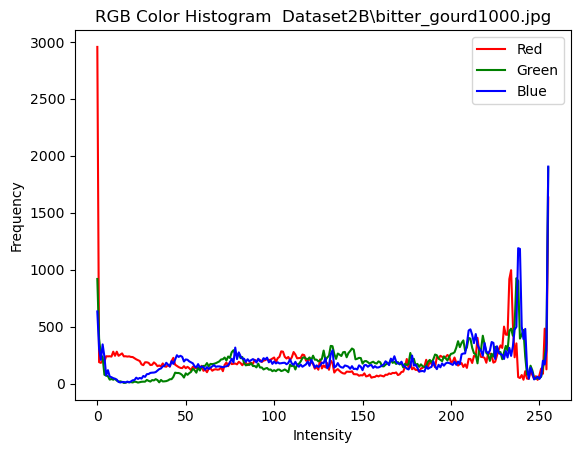

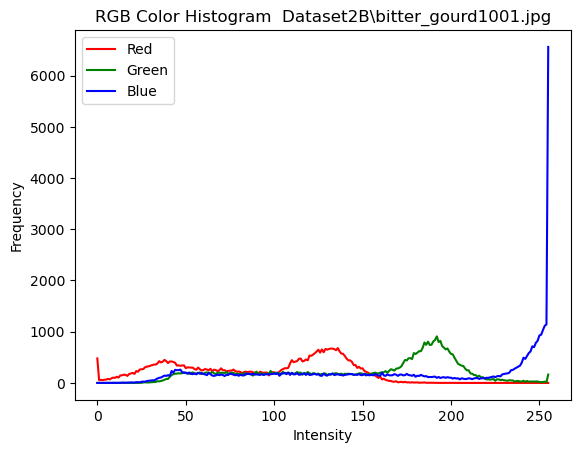

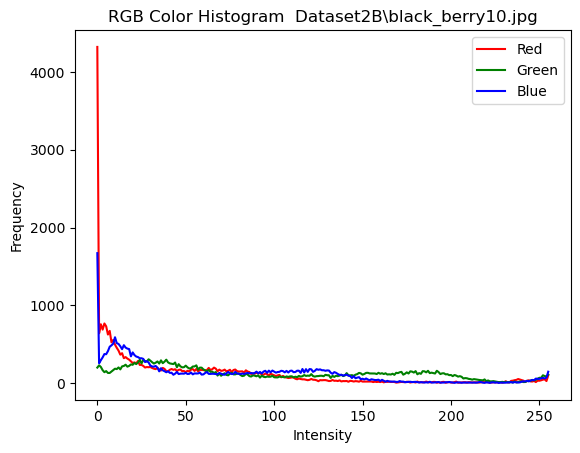

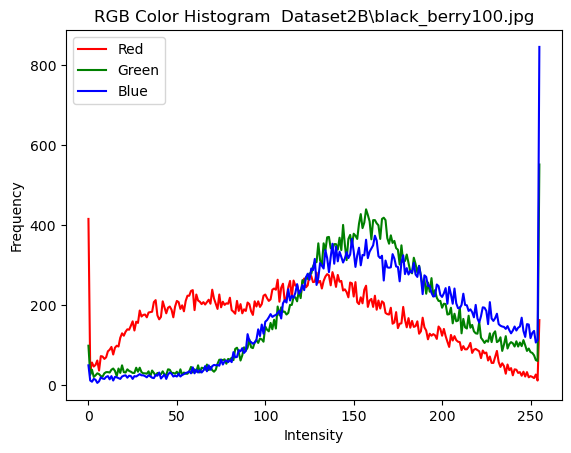

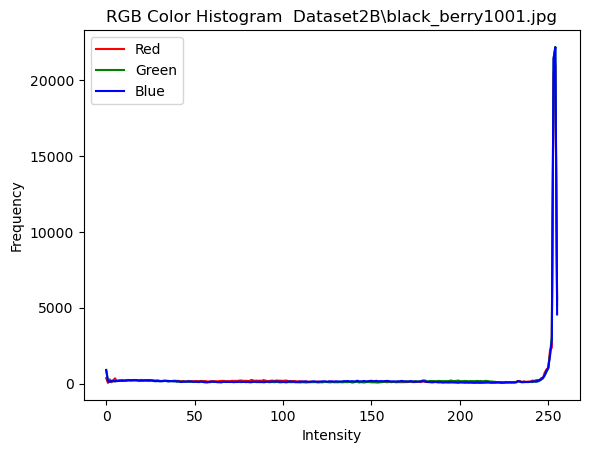

In [147]:
def color_histogram(image):
    # Split image ke dalam channel RGB masing2
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]

    # Plot histogram untuk masing2 channel
    hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
    hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])

    return hist_red, hist_green, hist_blue

class_folders = ['Dataset2B\\banana', 'Dataset2B\\betel_nut', 'Dataset2B\\bitter_gourd', 'Dataset2B\\black_berry']
images_per_folder = 3

for class_folder in class_folders:
    # Mengambil list nama image dari tiap folder
    image_filenames = os.listdir(class_folder)

    images_processed = 0

    for image_filename in image_filenames:
        if images_processed >= images_per_folder:
            break
        # Read image
        image_path = os.path.join(class_folder, image_filename)
        image = cv2.imread(image_path)

        hist_red, hist_green, hist_blue = color_histogram(image)
        plt.figure()
        plt.plot(hist_red, color='r', label='Red')
        plt.plot(hist_green, color='g', label='Green')
        plt.plot(hist_blue, color='b', label='Blue')
        plt.title('RGB Color Histogram  ' + class_folder + image_filename)
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
        images_processed += 1


Histogram warna dibuatkan untuk masing-masing 3 image pertama dari masing-masing class, yaitu 'banana', 'betel_nut', 'bitter_gourd', dan 'black_berry'. Dari histogram di atas kita dapat melihat warna apa saja yang paling dominan dalam masing-masing gambar.

Class banana:
img 0, 10, 1006

<img src="Dataset2B\banana\0.jpg" alt="banana0" width="150"/>
<img src="Dataset2B\banana\10.jpg" alt="banana10" width="150"/>
<img src="Dataset2B\banana\1006.jpg" alt="banana1006" width="150"/>

img 0 dan 10 memiliki intensitas warna biru yang tinggi dibanding merah dan hijau. Img 1006 memiliki intensitas RGB yang cukup merata, mempertimbangkan bahwa ada background sehingga warna merah dan hijau juga memiliki intensitas yang tinggi (tidak seperti img 0 dan 10 yang bg putih). Dapat dilihat bahwa pisang sendiri memiliki intensitas warna biru yang tinggi dibanding merah dan hijau.

Class betel_nut:
img 1, 10, 100

<img src="Dataset2B\betel_nut\1.jpg" alt="betelnut1" width="150"/>
<img src="Dataset2B\betel_nut\10.jpg" alt="betelnut10" width="150"/>
<img src="Dataset2B\betel_nut\100.jpg" alt="betelnut100" width="150"/>

betel nut 1 memiliki intensitas hijau yang rendah, lebih didominasi warna biru dan merah.
betel nut 10 didominasi wawrna biru dan hijau yang sangat signifikan. persebaran warnanya cukup merata.
betel nut 100 memiliki intensitas biru yang sangat signifikan, dengan warna R&G yang kurang lebih sama.

Class bitter_gourd:
img 100, 1000, 1001

<img src="Dataset2B\bitter_gourd\100.jpg" alt="gourd100" width="150"/>
<img src="Dataset2B\bitter_gourd\1000.jpg" alt="gourd1000" width="150"/>
<img src="Dataset2B\bitter_gourd\1001.jpg" alt="gourd1001" width="150"/>

bittergourd 100 didominasi warna hijau.
gourd 1000 memiliki intensitas warna biru dan merah yang tinggi.
gourd 1001 warna biru yang tinggi pula.

Class black_berry:
img 10, 100, 1001

<img src="Dataset2B\black_berry\10.jpg" alt="bb10" width="150"/>
<img src="Dataset2B\black_berry\100.jpg" alt="bb100" width="150"/>
<img src="Dataset2B\black_berry\1001.jpg" alt="bb1001" width="150"/>

black berry 10 persebaran warna lumayan rata.
bb100 lebih dominan hijau dan biru.
bb1001 warna biru melampaui segalanya, sangat dominan.

## Splitting and transforming

In [61]:
file_paths = []
labels = []

for class_label, class_folder in enumerate(class_folders):
    # Get the list of image filenames in the folder
    image_filenames = os.listdir(class_folder)
    
    for image_filename in image_filenames:
        # Construct the file path
        image_path = os.path.join(class_folder, image_filename)
        file_paths.append(image_path)
        
        # Append the class label to the labels list
        labels.append(class_label)

# Split the data into training and remaining data
x_train, x_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.1, random_state=42)

# Split the remaining data into validation and test sets
x_train, x_val, y_train, y_val,  = train_test_split(x_train, y_train, test_size=0.11, random_state=42)

# Print the sizes of each set
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))


Training set size: 1281
Validation set size: 159
Test set size: 160


In [62]:
master_folder = "Dataset2B"
output_dir = "SplitData"

# List semua nama file yang ada
all_filenames = []
for folder in os.listdir(master_folder):
    folder_path = os.path.join(master_folder, folder)
    all_filenames += [os.path.join(folder, filename) for filename in os.listdir(folder_path)]

# Split train-val-test 80-10-10
train_filenames, test_filenames = train_test_split(all_filenames, test_size=0.1, random_state=42)
train_filenames, val_filenames = train_test_split(train_filenames, test_size=0.11, random_state=42)

# Buat directories untuk menyimpan gambar
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy file ke dalam directory
for filename in train_filenames:
    source_path = os.path.join(master_folder, filename)
    dest_path = os.path.join(train_dir, filename)
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    shutil.copy(source_path, dest_path)

for filename in val_filenames:
    source_path = os.path.join(master_folder, filename)
    dest_path = os.path.join(val_dir, filename)
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    shutil.copy(source_path, dest_path)

for filename in test_filenames:
    source_path = os.path.join(master_folder, filename)
    dest_path = os.path.join(test_dir, filename)
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    shutil.copy(source_path, dest_path)


In [63]:
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,
)

# Validation dan test data tidak perlul diaugmentasi
datagen_valid = ImageDataGenerator(samplewise_center=True)
datagen_test = ImageDataGenerator(samplewise_center=True)

In [64]:
# load dataset
train_data = datagen_train.flow_from_directory(
    "SplitData\\train",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
)

valid_data = datagen_valid.flow_from_directory(
    "SplitData\\val",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
)

test_data = datagen_test.flow_from_directory(
    "SplitData\\test",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
)

Found 1281 images belonging to 4 classes.
Found 159 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [65]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

41
5
5


## Tantangan dan Kesulitan

Catatan: karena data tidak banyak, masih dapat dilihat secara sekilas, satu per satu, untuk membahas tantangan dan kesulitan di bawah ini.

1. Image quality:
- Resolution: Image resolution dari data cukup rendah sehingga sebenarnya ada kemungkinan fitur gambar yang tidak dapat ditangkap dengan baik, tetapi karena image yang digunakan sederhana dan secara resolusi masih lebih tinggi dari input resolution yang diminta, tidak ada masalah.
- Noise: Noise merujuk pada variasi brightness atau warna yang random pada suatu image. Karena jumlah data yang tidak banyak, dapat dilihat masing-masing gambar secara sekilas dan terlihat bahwa tidak ada noise, setidaknya tidak ada yang cukup signifikan untuk dipermasalahkan.

2. Image variability:
- Lighting conditions: Perbedaan lighting antar gambar menghasilkan kontras yang berbeda, sehingga mempersulit model untuk mempelajari objek secara keseluruhan. Dalam dataset yang diberikan, terdapat lighting yang berbeda, seperti image pada kondisi sedang terpapar matahari/terkena flash kamera (terlihat cukup terang) dan image dengan keadaan tertutup bayangan. Pencahayaan mempengaruhi warna objek.
- Perspective and angle: Suatu benda apabila dilihat dari sudut yang berbeda memiliki bentuk yang berbeda pula. Misal, angka '6' dapat berupa '6' atau '9' tergantung darimana kita melihatnya. Pada dataset, ada objek yang difoto dari depan, dari samping, terbalik, miring, dst.
- Occlusions: Penghalang objek. Apabila image memiliki objek yang menutupi objek utama, objek utama menjadi sulit dikenali. Terdapat sedikit sekali image yang memiliki penghalang. Ada pun tidak besar dan benda utama masih dapat dikenali bila dilihat secara manual.
- Background variability: Latar belakang, terutama latar belakang yang terlalu ramai akan mempersulit model dalam mengenali objek utama (kurang fokus). Background yang biasa saja juga dapat mengganggu apabila objek utamanya sangat kecil sehingga image harus difokuskan pada benda utama (baiknya dicrop). Dataset ini memiliki latar belakang yang berbeda-beda. Sebagian besar image  hanya difokuskan pada benda utama, tetapi tidak sedikit pula image dengan background tertentu, seperti pohon dari buah, atau mungkin tangan/wadah yang menampung buah.
- Scale variations: Ukuran yang berbeda-beda menyulitkan model untuk mengenali objek. Ada yang berukuran 390 x 260, ada yang 173 x 260. Ada yang bentuk horizontal maupun vertikal.

Contoh dalam bentuk image:
1. Image quality:
- Resolution: semua image memiliki resolusi yang mirip
- Noise: tidak terlihat noise pada data
2. Image variability:
- Lighting conditions: 
terkena cahaya terang vs terkena bayangan

<img src="Dataset2B\banana\589.jpg" alt="banana589" width="150"/>
<img src="Dataset2B\banana\983.jpg" alt="banana983" width="150"/>

- Perspective and angle: 
image dengan sudut pandang samping vs atas

<img src="Dataset2B\banana\182.jpg" alt="banana182" width="150"/>
<img src="Dataset2B\banana\147.jpg" alt="banana147" width="150"/>

- Occlusions: 
sedikit tertutup vs lumayan tertutup

<img src="Dataset2B\betel_nut\786.jpg" alt="betelNut786" width="150"/>
<img src="Dataset2B\black_berry\218.jpg" alt="bb218" width="150"/>

- Background variability: 
background variatif vs background polos

<img src="Dataset2B\black_berry\164.jpg" alt="bb164" width="150"/>
<img src="Dataset2B\black_berry\114.jpg" alt="bb114" width="150"/>

objek utama mirip background:

<img src="Dataset2B\bitter_gourd\58.jpg" alt="gourd58" width="150"/>

- Scale variations:
horizontal vs vertical

<img src="Dataset2B\bitter_gourd\318.jpg" alt="gourd318" width="150"/>
<img src="Dataset2B\bitter_gourd\458.jpg" alt="gourd458" width="150"/>

## Baseline Architecture

Transfer learning

In [66]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Freeze model
base_model.trainable = False

Compiling model

In [68]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.Flatten(name='flatten')(x)
x = keras.layers.Dense(4096, activation='relu', name='fc1')(x)
x = keras.layers.Dense(4096, activation='relu', name='fc2')(x)
outputs = keras.layers.Dense(4, activation='softmax', name='output_layer')(x)
vgg = keras.Model(inputs, outputs)

In [69]:
vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Architecture from scratch

In [70]:
def Baseline_VGG16(input_shape=(224, 224, 3), num_classes=1000):
    input_layer = layers.Input(shape=input_shape, name='input_layer')
    
    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_1')(input_layer)
    # 64: jumlah kernel gambar (mirip neuron) dan menggunakan kernel 3x3
    # diterapkan fungsi aktivasi relu pada output setiap layer konvolusi
    # same padding menambah padding ke input agar jumlah dimensi output = input
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)
    # pooling untuk reduksi dimensi, 
    # di setiap langkah pergeseran window 2x2, nilai maksimum diambil sebagai nilai yang akan diberikan ke layer pooling berikutnya.

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_1')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_1')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_2')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool3')(x)

    # Block 4
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool4')(x)

    # Block 5
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool5')(x)

    # Flatten
    x = layers.Flatten(name='flatten')(x)
    
    # FC layers
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)

    output_layer = layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

    model = Model(inputs=input_layer, outputs=output_layer, name='Baseline_VGG16')
    
    return model

vgg_instance = Baseline_VGG16(num_classes=4)
vgg_instance.summary()


Model: "Baseline_VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_3 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_1 (Conv2D)                │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_2 (Conv2D)                │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_3 (Conv2D)                │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_1 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_2 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_3 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool5 (MaxPooling2D)            │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
vgg_instance.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [84]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose = 2)

In [73]:
vgg.fit(train_data, steps_per_epoch=int(train_data.samples/train_data.batch_size), validation_data=valid_data, validation_steps=4, epochs=20, callbacks=[early_stopping])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6038 - loss: 137.5796 - val_accuracy: 0.8906 - val_loss: 1.0274
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7812 - loss: 1.5494 - val_accuracy: 0.9677 - val_loss: 0.2582
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8971 - loss: 0.5269 - val_accuracy: 0.9531 - val_loss: 0.5050
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9062 - loss: 0.2437 - val_accuracy: 0.8710 - val_loss: 1.5834
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9245 - loss: 0.3041 - val_accuracy: 0.9219 - val_loss: 0.6302
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9688 - loss: 0.9824 - val_accuracy: 0.9032 - val_loss: 1.2895
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9096 - loss: 0.9497 - val_accuracy: 0.9531 - val_loss: 0.3475
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9688 - loss: 0.2041 - val_accuracy: 0.8710 - val

In [74]:
vgg.evaluate(test_data, steps=int(test_data.samples/test_data.batch_size))

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9527 - loss: 0.7859


[1.0613086223602295, 0.9375]

Pre-trained model VGG16 menghasilkan akurasi yang sangat tinggi, baik untuk dataset validasi maupun testing.

In [76]:
vgg_instance.fit(train_data, steps_per_epoch=int(train_data.samples/train_data.batch_size), validation_data=valid_data, validation_steps=4, epochs=20, callbacks=[early_stopping])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 289s 7s/step - accuracy: 0.2626 - loss: 1.3865 - val_accuracy: 0.2109 - val_loss: 1.3895
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2188 - loss: 1.3877 - val_accuracy: 0.2258 - val_loss: 1.3930
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 338s 8s/step - accuracy: 0.2459 - loss: 1.3879 - val_accuracy: 0.1953 - val_loss: 1.3934
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.2188 - loss: 1.3920 - val_accuracy: 0.2903 - val_loss: 1.3816
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 398s 10s/step - accuracy: 0.2658 - loss: 1.3836 - val_accuracy: 0.2031 - val_loss: 1.3899
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2500 - loss: 1.3880 - val_accuracy: 0.2581 - val_loss: 1.3860
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.2535 - loss: 1.3860 - val_accuracy: 0.2109 - val_loss: 1.3884
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2500 - loss: 1.3936 - val_accuracy: 0.2258 - 

In [77]:
vgg_instance.evaluate(test_data, steps=int(test_data.samples/test_data.batch_size))

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1899 - loss: 1.3936


[1.3938406705856323, 0.20000000298023224]

Model yang dicode from scratch berdasarkan arsitektur VGG16 memiliki akurasi yang cukup rendah, yaitu sekitar 20%.

## Modified Architecture

Modifying vgg_instance ('architecture made from scratch'). Model ini menggunakan batch normalization pada setiap layer konvolusi, dan dropout 0.5 setelah setiap fully connected layer. Model yang diubah ini didefine sebagai model baru (tidak merubah original code) karena saya tidak ingin modelnya ditrain terus menerus menggunakan code yang sama. Yang saya cari adalah parameter yang sesuai.

Karena image yang digunakan tidak terlalu ramai (objek utama terlihat jelas dan tidak banyak pengganggu) dan objek utamanya sendiri tidak terlalu kompleks (memiliki 1 warna utama) saya asumsikan tidak perlu model yang kompleks sehingga saya kurangi jumlah layer yang digunakan.

In [78]:
def modified_VGGBaseline(input_shape=(224, 224, 3), num_classes=1000):
    input_layer = layers.Input(shape=input_shape, name='input_layer')

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_1')(input_layer)
    x = BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_2')(x)
    x = BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_1')(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_2')(x)
    x = BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_1')(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_2')(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_3')(x)
    x = BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool3')(x)

    x = layers.Flatten(name='flatten')(x)

    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    
    output_layer = layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

    model = Model(inputs=input_layer, outputs=output_layer, name='Baseline_VGG16')
    
    return model

modified_vgg = modified_VGGBaseline(num_classes=4)
modified_vgg.summary()


Model: "Baseline_VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_3 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   822,087,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 840,625,476 (3.13 GB)

 Trainable params: 840,623,172 (3.13 GB)

 Non-trainable params: 2,304 (9.00 KB)

In [79]:
modified_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
modified_vgg.fit(train_data, steps_per_epoch=int(train_data.samples/train_data.batch_size), validation_data=valid_data, validation_steps=4, epochs=20, callbacks=[early_stopping])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 481s 11s/step - accuracy: 0.4281 - loss: 221.1161 - val_accuracy: 0.4141 - val_loss: 9278.9473
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.5625 - loss: 42.5155 - val_accuracy: 0.3871 - val_loss: 7158.0684
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 444s 10s/step - accuracy: 0.5904 - loss: 57.0748 - val_accuracy: 0.4375 - val_loss: 468.9920
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5000 - loss: 36.0704 - val_accuracy: 0.4516 - val_loss: 499.4338
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 492s 12s/step - accuracy: 0.6258 - loss: 27.6366 - val_accuracy: 0.3984 - val_loss: 224.8589
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5625 - loss: 18.6357 - val_accuracy: 0.5161 - val_loss: 184.3037
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 441s 11s/step - accuracy: 0.5832 - loss: 14.0519 - val_accuracy: 0.6250 - val_loss: 7.2545
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.6250 - loss: 8.8

In [83]:
modified_vgg.evaluate(test_data, steps=int(test_data.samples/test_data.batch_size))

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3635 - loss: 8949.7324


[8685.9375, 0.38749998807907104]

Model 'vgg_instance' (yang bukan pretrained) menunjukkan hasil yang buruk, yakni hanya akurasi sekitar 38%. Pengurangan layer dan penambahan batch normalization dan dropout telah meningkatkan akurasi sekitar 20%. Aslinya model ini mampu menghasilkan akurasi yang lumayan, tetapi ketika training saya menerapkan early stopping dan retain weight, dimana programnya memilih epoch 1 dengan weight yang kurang baik.

Code di bawah ini merupakan modifikasi kedua, dengan menambahkan 1 blok konvolusi (2 layers), mengubah jumlah nodes, menerapkan batch normalization dan dropout (0.2) pada tiap blok, menggunakan global average pooling dan hanya menggunakan 1 fully connected layer. Jumlah nodes yang digunakan bersifat random karena merupakan hasil eksperimen.

In [85]:
def secondModif(input_shape=(224, 224, 3), num_classes=4):
        input_layer = layers.Input(shape=input_shape, name='input_layer')

        x = layers.Conv2D(448, (3, 3), activation='relu', padding='same', name='conv1_1')(input_layer)
        x = layers.Conv2D(448, (3, 3), activation='relu', padding='same', name='conv1_2')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)

        x = layers.Conv2D(448, (3, 3), activation='relu', padding='same', name='conv2_1')(input_layer)
        x = layers.Conv2D(192, (3, 3), activation='relu', padding='same', name='conv2_2')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

        x = layers.Conv2D(192, (3, 3), activation='relu', padding='same', name='conv3_1')(input_layer)
        x = layers.Conv2D(192, (3, 3), activation='relu', padding='same', name='conv3_2')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool3')(x)

        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4_1')(input_layer)
        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4_2')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool4')(x)

        # Global Pooling
        x = layers.GlobalAveragePooling2D()(x)
        # FC layers
        x = layers.Dense(4096, activation='relu', name='fc1')(x)
        x = Dropout(0.5)(x)

        output_layer = layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

        model = Model(inputs=input_layer, outputs=output_layer)
    
        return model

modified2 = secondModif(num_classes=4)
modified2.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_1 (Conv2D)                │ (None, 224, 224, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_2 (Conv2D)                │ (None, 224, 224, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 224, 224, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 224, 224, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 112, 112, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,667,332 (6.36 MB)

 Trainable params: 1,666,820 (6.36 MB)

 Non-trainable params: 512 (2.00 KB)

In [86]:
modified2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
modified2.fit(train_data, steps_per_epoch=int(train_data.samples/train_data.batch_size), validation_data=valid_data, validation_steps=4, epochs=20, callbacks=[early_stopping])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 905s 22s/step - accuracy: 0.5571 - loss: 1.0916 - val_accuracy: 0.7188 - val_loss: 0.7635
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.7812 - loss: 0.9731 - val_accuracy: 0.5806 - val_loss: 1.0295
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1136s 29s/step - accuracy: 0.6979 - loss: 0.7934 - val_accuracy: 0.6406 - val_loss: 0.9282
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 289ms/step - accuracy: 0.7500 - loss: 0.5504 - val_accuracy: 0.6774 - val_loss: 0.7742
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1117s 27s/step - accuracy: 0.7548 - loss: 0.6470 - val_accuracy: 0.5859 - val_loss: 1.5930
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6875 - loss: 0.7901 - val_accuracy: 0.5484 - val_loss: 1.1504
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1071s 27s/step - accuracy: 0.7512 - loss: 0.6264 - val_accuracy: 0.7734 - val_loss: 0.6650
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.8125 - loss: 0.5834 - val_accuracy

KeyboardInterrupt: 

In [88]:
modified2.evaluate(test_data, steps=int(test_data.samples/test_data.batch_size))

5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7273 - loss: 0.6794


[0.7253903746604919, 0.699999988079071]

Model terakhir yang dievaluasi memiliki akurasi sekitar 70%, peningkatan dari sebelumnya. Hal ini dapat dipengaruhi dari jumlah fc layers yang berbeda. Dapat dikatakan bahwa jumlah layer dan nodes yang lebih sedikit dapat meningkatkan akurasi model. Model terakhir ini mampu mencapai akurasi hingga 80% tetapi karena saya interrupt pada epoch 11, ia menggunakan weights pada epoch 10 (padahal epoch 9 terbaik).

## Link Video

https://drive.google.com/drive/folders/1R87CpQG4sOwue4cyvQrcKc-ce_N5AZhD?usp=drive_link

Link drive merupakan folder yang sama dengan no.1, tetapi mengandung video untuk no.2